In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

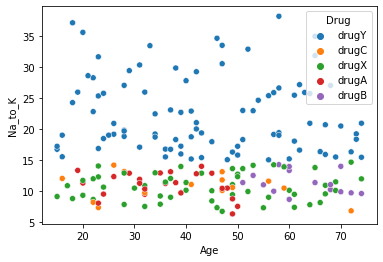

In [8]:
sns.scatterplot(x = "Age", y ="Na_to_K", data =df, hue = "Drug");

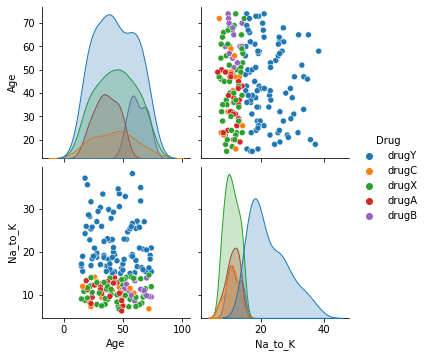

In [9]:
sns.pairplot(df, hue = "Drug");

<AxesSubplot:xlabel='Drug', ylabel='count'>

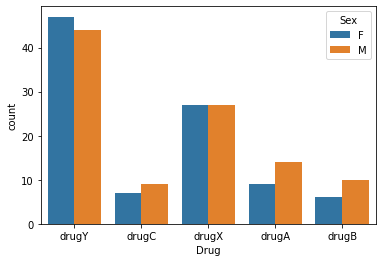

In [66]:
sns.countplot(x = "Drug", data = df, hue = "Sex")

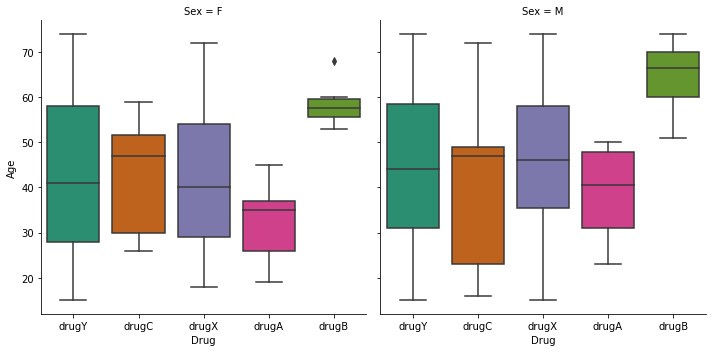

In [71]:
sns.catplot(x = "Drug", data = df, y = "Age",
           kind = "box", col = "Sex", palette = "Dark2");

# Feature Engineering

In [12]:
X = pd.get_dummies(df.drop("Drug", axis = 1), drop_first=True)

In [13]:
y = df["Drug"]

# Train | Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier
## Default Hyperparameters

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


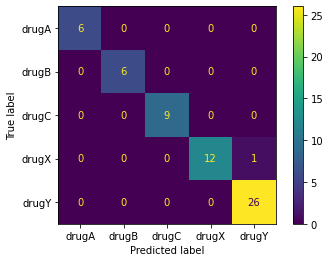

In [22]:
plot_confusion_matrix(model, X_test, y_test)

In [23]:
model.feature_importances_

array([0.13299359, 0.50629652, 0.        , 0.12581759, 0.14150858,
       0.09338373])

In [24]:
X.columns

Index(['Age', 'Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL'], dtype='object')

In [28]:
pd.DataFrame(index = X.columns, data = model.feature_importances_,
            columns= ["Feature Importance"]).sort_values("Feature Importance", ascending = False)

,Feature Importance
Na_to_K,0.506297
BP_NORMAL,0.141509
Age,0.132994
BP_LOW,0.125818
Cholesterol_NORMAL,0.093384
Sex_M,0.000000


# Visualize the Tree

In [30]:
from sklearn.tree import plot_tree

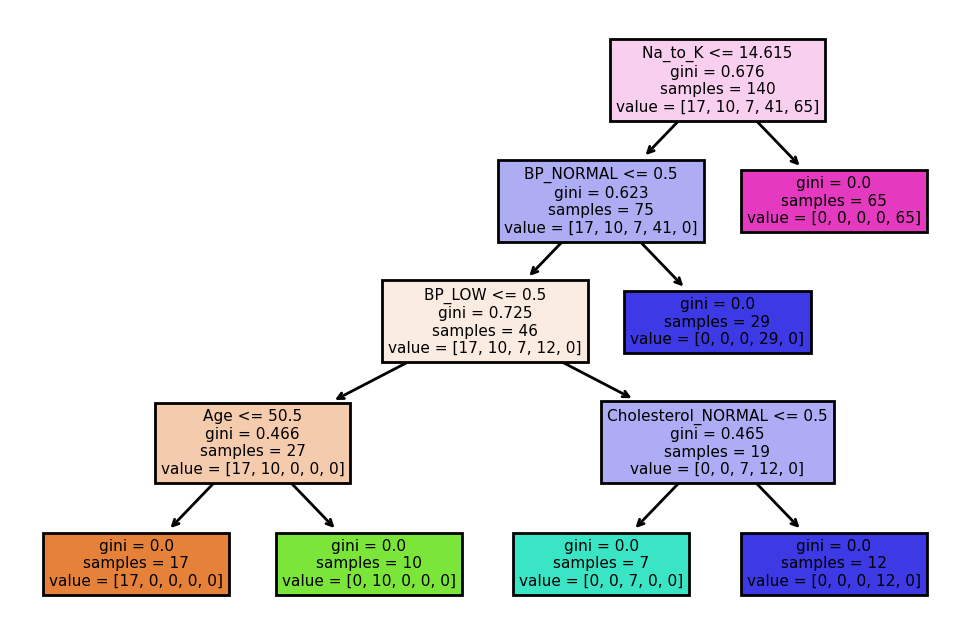

In [35]:
plt.figure(dpi = 200)

plot_tree(model, feature_names = X.columns, filled= True);

# Reporting Model Results

In [36]:
def report_model(model):
    model_pred = model.predict(X_test)
    print(classification_report(y_test, model_pred))
    print("\n")
    plt.figure(dpi = 200)
    plot_tree(model, feature_names = X.columns, filled= True);

In [61]:
# help(DecisionTreeClassifier)

In [52]:
prunned_model = DecisionTreeClassifier(max_depth=3)

In [53]:
prunned_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         6
       drugB       0.00      0.00      0.00         6
       drugC       0.00      0.00      0.00         9
       drugX       0.57      0.92      0.71        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.73        60
   macro avg       0.41      0.58      0.47        60
weighted avg       0.59      0.73      0.64        60





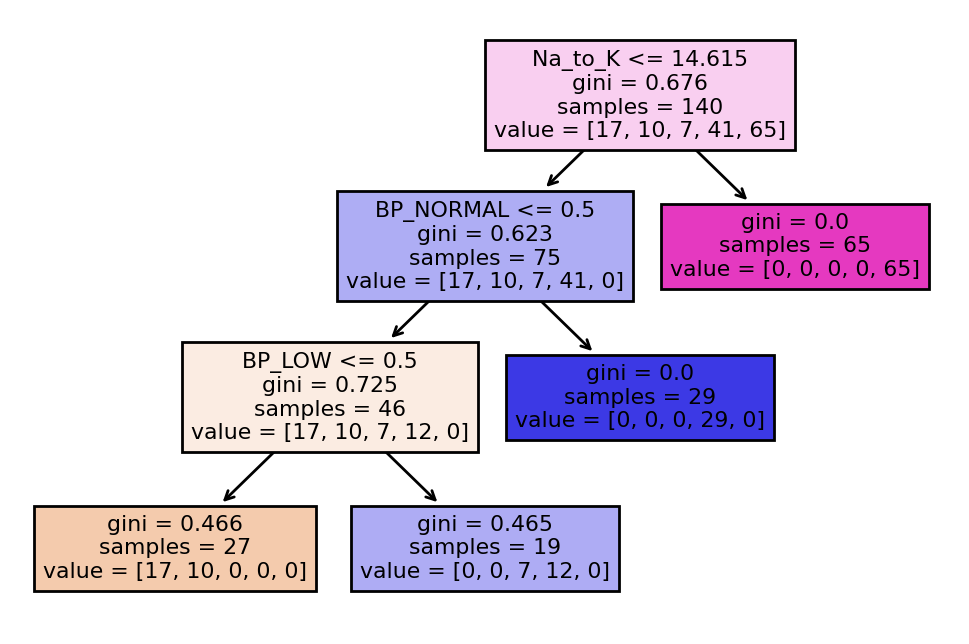

In [54]:
report_model(prunned_model)

In [55]:
prunned2_model = DecisionTreeClassifier(max_leaf_nodes= 4)

In [56]:
prunned2_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         6
       drugB       0.00      0.00      0.00         6
       drugC       0.00      0.00      0.00         9
       drugX       0.57      0.92      0.71        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.73        60
   macro avg       0.41      0.58      0.47        60
weighted avg       0.59      0.73      0.64        60





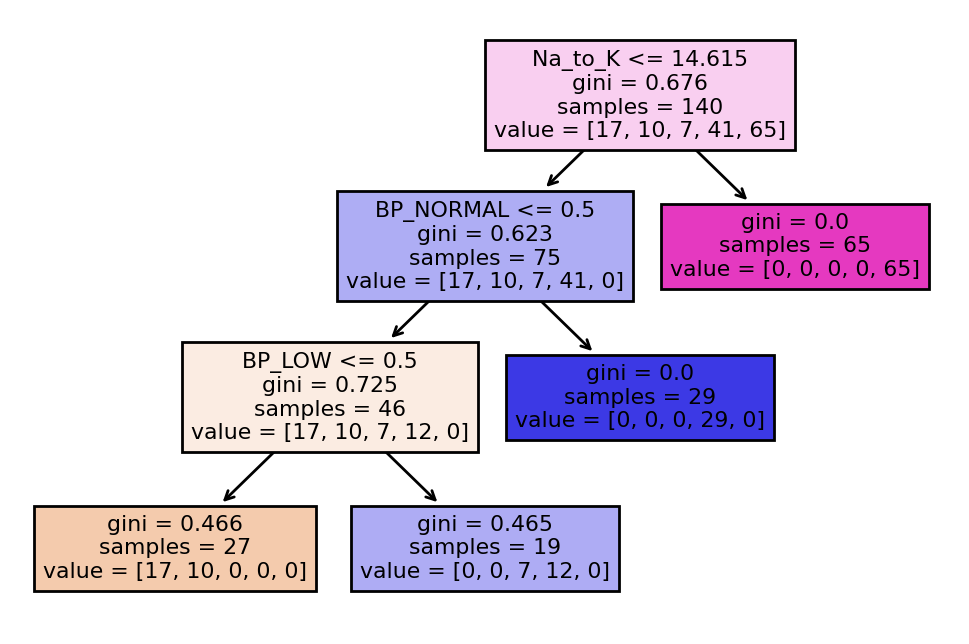

In [57]:
report_model(prunned2_model)

In [58]:
entropy_model = DecisionTreeClassifier(criterion="entropy")

In [59]:
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60





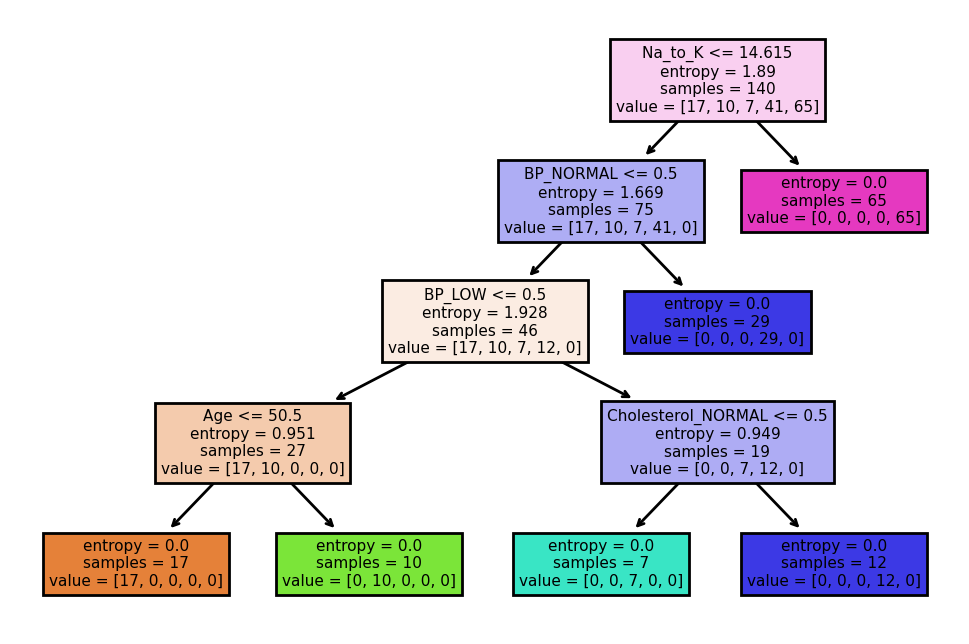

In [60]:
report_model(entropy_model)